# SE-PQA - Data analisys

Armanni Luca - 509085

Ghiotto Alessandro - 513944

---

In this first notebook we look at what the files present in the `PIR_data` folder contains.

### Table of contents:
- First look at the data
- Detailed Analysis
  - Answers
  - Questions
  - Tags
  - Users
  - Postlinks

In [6]:
# !gdown 1HhgXzyEpsZNcenU9XhJuOYyDUKEzUse4
# !unzip pir_data.zip
# !pip install emoji
# !pip install langdetect

In [5]:
import pandas as pd
from ast import literal_eval
import csv
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import os

# Move to the parent directory
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

def print_example_details(example : dict):
    # print the keys
    print("KEYS:")
    print(", ".join(example.keys()))
    
    # print the values
    print("\nVALUES:")
    max_key_length = max(len(key) for key in example.keys())
    for key, value in example.items():
        print(f"{key.ljust(max_key_length)}: {value}")

# First look at the data

### /answer_retrieval

Files present in answer_retrieval, the ones in which we have the collection of documents, and the queries with the associated qrels for train, validation and test.

In [8]:
example = !head -1 PIR_data/answer_retrieval/train/subset_data.jsonl
example = literal_eval(example[0])
print("TRAIN/SUBSET_DATA.JSONL (first entry)\n"+"-"*80)
print_example_details(example)

TRAIN/SUBSET_DATA.JSONL (first entry)
--------------------------------------------------------------------------------
KEYS:
id, text, title, timestamp, score, views, favorite, user_id, user_questions, user_answers, tags, rel_ids, rel_scores, rel_timestamps, best_answer

VALUES:
id            : academia_100305
text          : What are CNRS research units and how are they staffed The Centre national de la recherche scientifique (CNRS) is the major funding body in France. With nearly 32,000 staff members it is bigger than the US NIH and US NSF combined, yet only has a 1/10 of the budget.Both CNRS and NIH have multiple institutes (although the NIH institutes are all health related and CNRS covers a range of science). The CNRS then has 952 mixed research units, 32 proper research units, 135 service units, as well as 36 international units while the NIH has a large number of intramural labs.What are these different research units and how are they staffed (full time researchers or academics 

In [9]:
example = !head -6 PIR_data/answer_retrieval/train/qrels.json
example = ''.join(example[1:]).strip()
example = literal_eval('{'+example+'}')
print("TRAIN/QRELS.JSON (first five entries)\n"+"-"*80)
print_example_details(example)

TRAIN/QRELS.JSON (first five entries)
--------------------------------------------------------------------------------
KEYS:
academia_100305, academia_100456, academia_103390, academia_10481, academia_10649

VALUES:
academia_100305: academia_100217
academia_100456: academia_100462
academia_103390: academia_103391
academia_10481 : academia_10499
academia_10649 : academia_10650


as written in `train/subset_data`, we can see from the qrels that the answer to *academia_100305* is *academia_100217*

In [10]:
example = !head -6 PIR_data/answer_retrieval/subset_answers.json
example = ''.join(example[1:]).strip()
example = literal_eval('{'+example+'}')
print("SUBSET_ANSERS.JSON (first five entries)\n"+"-"*80)
print_example_details(example)

SUBSET_ANSERS.JSON (first five entries)
--------------------------------------------------------------------------------
KEYS:
writers_2010, writers_2018, writers_2023, writers_2026, writers_2095

VALUES:
writers_2010: TL;DRIf you're going to do present tense do it for a good reason and mitigate the downsides.Long versionPresent tense lends a sense of immediacy to the work and also may make it feel like you are reading a screenplay or drama as opposed to a typical past tense novel.  That's the good part.  If you want urgency and a sense of being close to the action, present tense can help.  Present tense is naturally suspenseful because it gives readers a sense that nobody, not even the narrator, knows what is coming.Unfortunately the present tense comes with lots of downsides.  It is not typical in English language novels.  Charles Dicken's Bleak House in the mid-19th century written half in present tense is probably the first example of the present-tense in novels, which have a histo

---

### Other files

Next we have the other files, related to other features that we have in StackExchange, like comments, tags..., and the full versions of the datasets reguarding the questions and the answers.

In [11]:
example = !head -2 PIR_data/answer_retrieval/answers.csv
lines = list(csv.reader(example))
example_dict = {key: value for key, value in zip(lines[0], lines[1])}
print("ANSWERS.CSV (first entry)\n"+"-"*80)
print_example_details(example_dict)

ANSWERS.CSV (first entry)
--------------------------------------------------------------------------------
KEYS:
Id, CreationDate, Score, Title, Tags, CommentCount, ParentId, AccountId, Text

VALUES:
Id          : writers_8
CreationDate: 2010-11-18T20:45:45.533
Score       : 9
Title       : 
Tags        : 
CommentCount: 0
ParentId    : writers_1
AccountId   : 225829
Text        : BeginningWriters.com (via archive.org) has some good articles for beginning writers.


In [12]:
example = !head -2 PIR_data/questions.csv
lines = list(csv.reader(example))
example_dict = {key: value for key, value in zip(lines[0], lines[1])}
print("QUESTIONS.CSV (first entry)\n"+"-"*80)
print_example_details(example_dict)

QUESTIONS.CSV (first entry)
--------------------------------------------------------------------------------
KEYS:
Id, AcceptedAnswerId, CreationDate, Score, ViewCount, Body, Title, Tags, AnswerCount, CommentCount, FavoriteCount, AccountId, Text, Community

VALUES:
Id              : writers_1
AcceptedAnswerId: writers_15
CreationDate    : 2010-11-18T20:40:32.857
Score           : 31
ViewCount       : 1597
Body            : I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.Are there some resources on how to start becoming a writer?I'm thinking something with tips and easy exercises to get the ball rolling.
Title           : What are some online guides for starting writers?
Tags            : <resources><first-time-author>
AnswerCount     : 10
CommentCount    : 6
FavoriteCount   : 20
AccountId       : 1335
Text            : What are some online guides for starting writers? I'v

In [13]:
qa = pd.read_csv("PIR_data/questions_with_answer.csv",engine="python",on_bad_lines="skip")
print("QUESTIONS_WITH_ANSWER.CSV (first entry)\n"+"-"*80)
qa_dict = {col: qa.iloc[0][col] for col in qa.columns}
print_example_details(qa_dict)

QUESTIONS_WITH_ANSWER.CSV (first entry)
--------------------------------------------------------------------------------
KEYS:
Id, PostTypeId, AcceptedAnswerId, CreationDate, Score, ViewCount, Body, OwnerUserId, Title, Tags, AnswerCount, CommentCount, FavoriteCount, ParentId, Id_, AccountId

VALUES:
Id              : writers_1
PostTypeId      : 1
AcceptedAnswerId: writers_15
CreationDate    : 2010-11-18T20:40:32.857
Score           : 31
ViewCount       : 1597
Body            : <p>I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.</p>

<p>Are there some resources on how to start becoming a writer?</p>

<p>I'm thinking something with tips and easy exercises to get the ball rolling.</p>

OwnerUserId     : 8.0
Title           : What are some online guides for starting writers?
Tags            : <resources><first-time-author>
AnswerCount     : 10
CommentCount    : 6
FavoriteCoun

In [14]:
example = !head -2 PIR_data/comments.csv
lines = list(csv.reader(example))
example_dict = {key: value for key, value in zip(lines[0], lines[1])}
print("COMMENTS.CSV (first entry)\n"+"-"*80)
print_example_details(example_dict)

COMMENTS.CSV (first entry)
--------------------------------------------------------------------------------
KEYS:
Id, PostId, Score, Text, CreationDate, ContentLicense, AccountId

VALUES:
Id            : writers_1
PostId        : writers_1
Score         : 1
Text          : With writing, do you mean fiction or non-fiction?
CreationDate  : 2010-11-18T20:41:27.253
ContentLicense: CC BY-SA 2.5
AccountId     : 94574


In [15]:
example = !head -2 PIR_data/postlinks.csv
lines = list(csv.reader(example))
example_dict = {key: value for key, value in zip(lines[0], lines[1])}
print("POSTLINKS.CSV (first entry)\n"+"-"*80)
print_example_details(example_dict)

POSTLINKS.CSV (first entry)
--------------------------------------------------------------------------------
KEYS:
PostId, RelatedPostId, LinkType

VALUES:
PostId       : writers_76
RelatedPostId: writers_113
LinkType     : related


In [16]:
example = !head -2 PIR_data/tags.csv
lines = list(csv.reader(example))
example_dict = {key: value for key, value in zip(lines[0], lines[1])}
print("TAGS.CSV (first entry)\n"+"-"*80)
print_example_details(example_dict)

TAGS.CSV (first entry)
--------------------------------------------------------------------------------
KEYS:
Id, TagName, Count, ExcerptPostId, WikiPostId, PostId, Body, Body_Excerpt, Body_Wiki, Community

VALUES:
Id           : 6
TagName      : third-person
Count        : 64
ExcerptPostId: writers_6361
WikiPostId   : writers_6360
PostId       : writers_6360
Body         : Questions about viewpoints like "he said", "she said".  
Body_Excerpt : Questions about viewpoints like "he said", "she said". 
Body_Wiki    : 
Community    : writers


In [17]:
users = pd.read_csv("PIR_data/users.csv",engine="python",on_bad_lines="skip")
print("USERS.CSV (first entry)\n"+"-"*80)
users_dict = {col: users.iloc[0][col] for col in users.columns}
print_example_details(users_dict)

USERS.CSV (first entry)
--------------------------------------------------------------------------------
KEYS:
Id, Reputation, CreationDate, DisplayName, AboutMe, Views, UpVotes, DownVotes, AccountId

VALUES:
Id          : -1
Reputation  : 1
CreationDate: 2010-11-18T19:05:26.543
DisplayName : Community
AboutMe     : <p>Hi, I'm not really a person.</p>
<p>I'm a background process that helps keep this site clean!</p>
<p>I do things like</p>
<ul>
<li>Randomly poke old unanswered questions every hour so they get some attention</li>
<li>Own community questions and answers so nobody gets unnecessary reputation from them</li>
<li>Own downvotes on spam/evil posts that get permanently deleted</li>
<li>Own suggested edits from anonymous users</li>
<li><a href="http://meta.stackexchange.com/a/92006">Remove abandoned questions</a></li>
</ul>

Views       : 151
UpVotes     : 5590
DownVotes   : 4155
AccountId   : -1.0


---

# Detailed Analisys

Now we take a more in depth look to the data in which we are more interested to. for example the subset_answers, which constitutes our collection of documents.

In [18]:
# utility function to plot some statistics
def get_stats_text(count_series, title='Answer Length'):
    text_stats = {
        ' ': [f'{title}'],
        'mean': [round(count_series.mean(), 2)],
        'std': [round(count_series.std(), 2)],
        'median': [round(count_series.median(), 2)],
        '25%': [round(count_series.quantile(0.25), 2)],
        '75%': [round(count_series.quantile(0.75), 2)],
        '99%': [round(count_series.quantile(0.99), 2)],
        'min': [round(count_series.min(), 2)],
        'max': [round(count_series.max(), 2)],
    }
    stats_df = pd.DataFrame(text_stats)
    stats_df = stats_df.set_index(' ')
    return stats_df

### ANSWERS

In [13]:
# COLLECTION OF DOCUMENTS (ANSWERS)
corpus_df = pd.read_json('PIR_data/answer_retrieval/subset_answers.json', orient='index')
corpus_df = corpus_df.reset_index()
corpus_df.columns = ['docno', 'text']

display(corpus_df.head(3))

empty_docs_count = corpus_df[corpus_df['text'].str.strip() == ''].shape[0]
print(f"Number of empty documents: {empty_docs_count}")

zero_length_docs_count = corpus_df[corpus_df['text'].str.len() == 0].shape[0]
print(f"Number of documents with length 0: {zero_length_docs_count}")

,docno,text
0,writers_2010,TL;DRIf you're going to do present tense do it...
1,writers_2018,"Your writing style is stream-of-consciousness,..."
2,writers_2023,Place emphasis on uncomfortable things. Depend...


Number of empty documents: 0
Number of documents with length 0: 0


In [20]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
DetectorFactory.seed = 0

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Detect language for each text entry
corpus_df['language'] = corpus_df['text'].apply(detect_language)

# Analyze the distribution of languages
language_distribution = corpus_df['language'].value_counts()

print(language_distribution)

language
en         9351
he           32
de            3
fr            2
es            1
tr            1
nl            1
tl            1
id            1
unknown       1
vi            1
ru            1
sv            1
fi            1
Name: count, dtype: int64


In [21]:
import emoji

# count emojis
corpus_df['emoji_count'] = corpus_df['text'].apply(emoji.emoji_count)

examples_with_emojis = corpus_df[corpus_df['emoji_count'] > 0]
print(f"Number of entries with emojis: {len(examples_with_emojis)}")
print("EXAMPLE:", examples_with_emojis.iloc[0]['text'])

Number of entries with emojis: 21
EXAMPLE: On a weight basis, plant-based foods (especially whole foods) generally have:✅ more vitamins✅ more minerals✅ more dietary fibre✅ more water less calories less protein less fatSome people who adopt a plant-based diet find that they need to eat more food (more mass and more volume) in order to reach the same feeling of satiety (fullness) that they did on their earlier diet.I'm not aware of any evidence that meat stays in the digestive system longer than other foods.


,mean,std,median,25%,75%,99%,min,max
,,,,,,,,
Answer Length,234.28,257.09,159.0,85.0,289.0,1222.03,1,4412


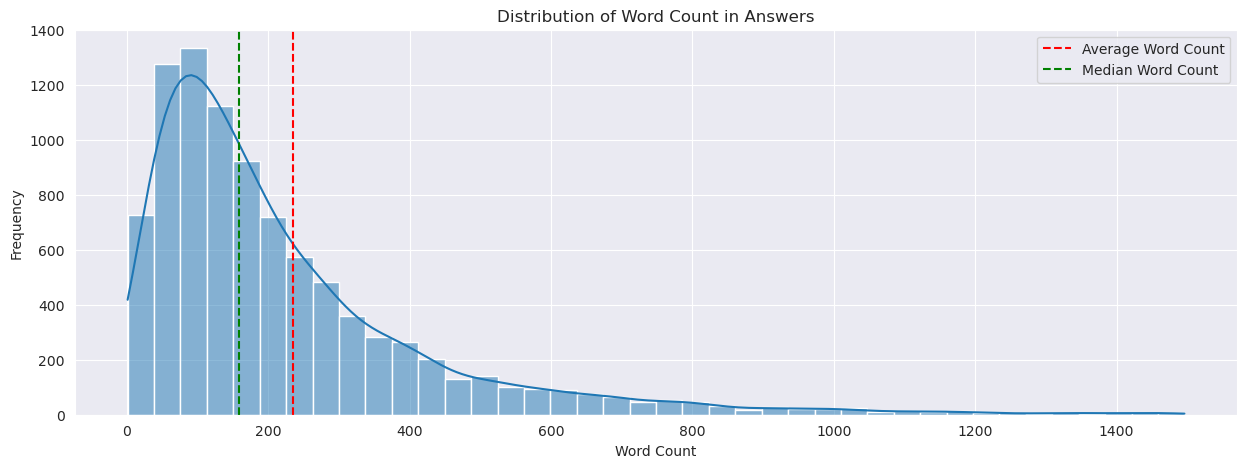

In [22]:
word_count = corpus_df['text'].apply(lambda x: len(x.split()))

stats_df = get_stats_text(word_count)
display(stats_df)

plt.figure(figsize=(15, 5))

# Filter the word count series for plotting
threshold = 1500
filtered_word_count = word_count[word_count < threshold]

# Seaborn histogram
sns.histplot(filtered_word_count, kde=True, bins=40)
plt.axvline(word_count.mean(), color='r', linestyle='--', label=f'Average Word Count')
plt.axvline(word_count.median(), color='g', linestyle='--', label=f'Median Word Count')  
plt.legend()
plt.title('Distribution of Word Count in Answers')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

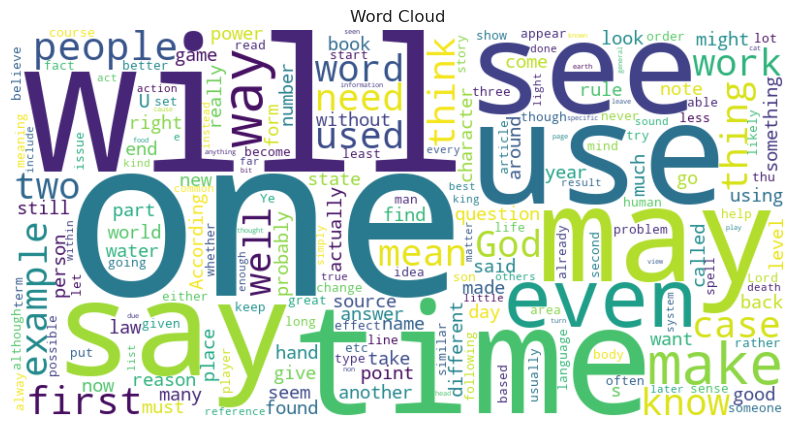

In [23]:
from wordcloud import WordCloud, STOPWORDS

# here we take a look at the word cloud, 
# this helps us to understand the most common words in the corpus
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=STOPWORDS
    ).generate(' '.join(corpus_df['text']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

Since the dataset is not specific to a certain field, BERT-like models should works fine even if we don't fine tune them on our data.

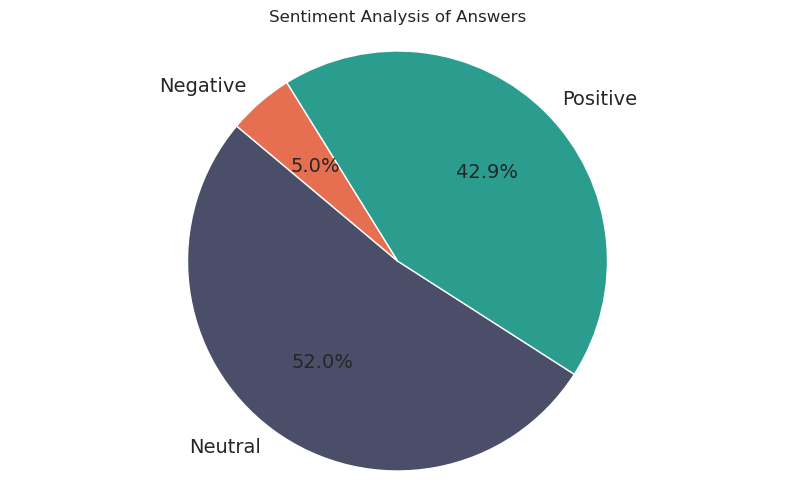

In [24]:
from textblob import TextBlob
# sentiment analysis, lexicon-based
sentiment = corpus_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_category = pd.cut(sentiment, bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

sentiment_counts = sentiment_category.value_counts()

# Pie chart for sentiment analysis
plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=['#4a4e69', '#2a9d8f', '#e76f51'], textprops={'fontsize': 14})
plt.title('Sentiment Analysis of Answers')
plt.axis('equal')
plt.show()

### QUESTIONS

In [25]:
# SAMPLES (QUERIES)
train_queries = pd.read_json('PIR_data/answer_retrieval/train/subset_data.jsonl', lines=True)
val_queries = pd.read_json('PIR_data/answer_retrieval/val/subset_data.jsonl', lines=True)
test_queries = pd.read_json('PIR_data/answer_retrieval/test/subset_data.jsonl', lines=True)
print("TRAIN QUERIES:")
display(train_queries.head(3))

TRAIN QUERIES:


,id,text,title,timestamp,score,views,favorite,user_id,user_questions,user_answers,tags,rel_ids,rel_scores,rel_timestamps,best_answer
0,academia_100305,What are CNRS research units and how are they ...,What are CNRS research units and how are they ...,2017-12-11 16:30:20,14,2484,2.0,1106095,"[workplace_40845, workplace_40899, workplace_9...","[travel_45926, travel_46391, travel_47403, tra...","[funding, france]",[academia_100217],[1],"[1512814966, 1513014615, 1513020822]",academia_100217
1,academia_100456,Is there a free (as in freedom) alternative to...,Is there a free (as in freedom) alternative to...,2017-12-13 19:02:32,13,1117,2.0,1106095,"[workplace_40845, workplace_40899, workplace_9...","[travel_45926, travel_46391, travel_47403, tra...","[peer-review, open-access]",[academia_100462],[1],"[1513205016, 1536615064, 1553005541, 1615097827]",academia_100462
2,academia_103390,Search for StackExchange citations with Google...,Search for StackExchange citations with Google...,2018-02-06 16:40:59,2,157,1.0,1532620,"[writers_27613, writers_29562, sound_42166, so...","[skeptics_39944, philosophy_3098, philosophy_9...","[citations, google-scholar]",[academia_103391],[1],[1517936080],academia_103391


In [26]:
# analyze the distribution of languages fot questions
train_queries['language'] = train_queries['text'].apply(detect_language)
language_distribution = train_queries['language'].value_counts()
print(language_distribution)

language
en    9987
he       7
fr       2
so       1
tl       1
ca       1
nl       1
Name: count, dtype: int64


,mean,std,median,25%,75%,99%,min,max
,,,,,,,,
Title Length,10.30,4.09,10.0,7.0,13.0,22.0,1,31
Text Length,118.25,111.64,89.0,57.0,143.0,520.0,6,2549


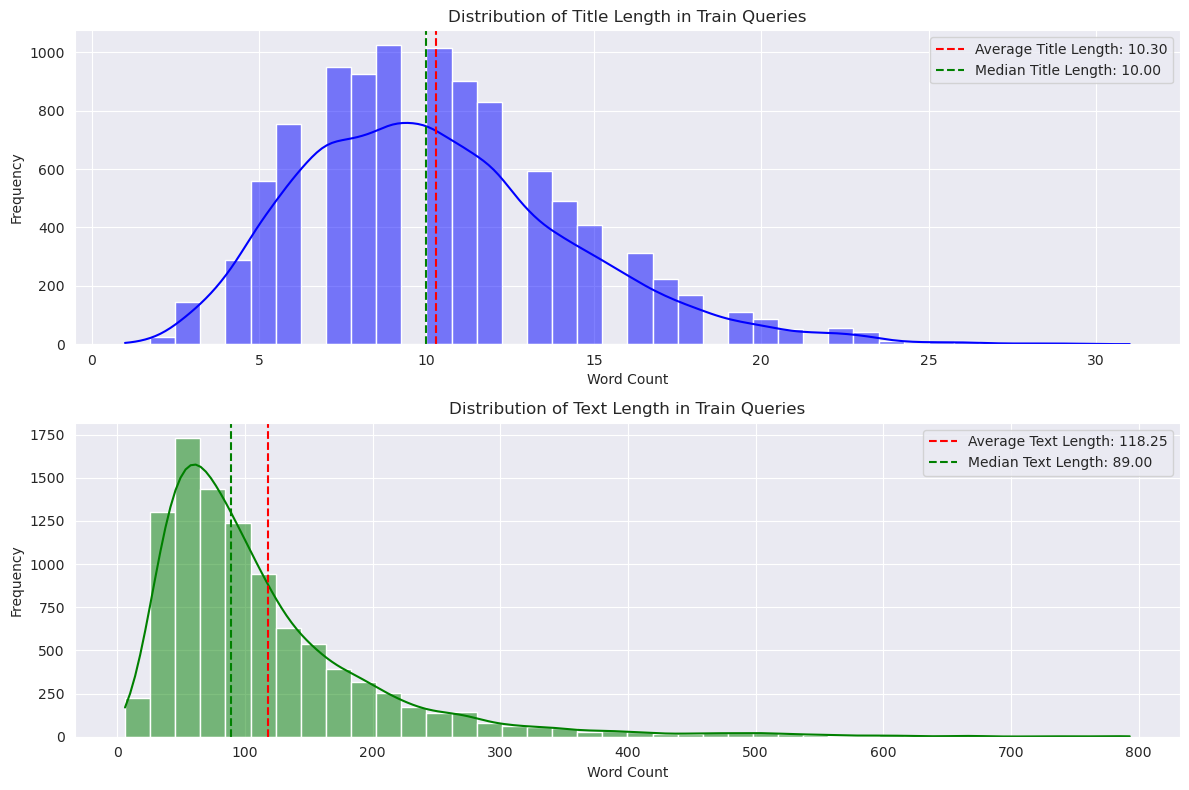

In [27]:
train_queries = pd.read_json('PIR_data/answer_retrieval/train/subset_data.jsonl', lines=True)
word_count_title = train_queries['title'].apply(lambda x: len(x.split()))
word_count_text = train_queries['text'].apply(lambda x: len(x.split()))

# calculate statistics for "title" and "text"
stats_df_title = get_stats_text(word_count_title, title='Title Length')
stats_df_text = get_stats_text(word_count_text, title='Text Length')
concatenated_stats = pd.concat([stats_df_title, stats_df_text], axis=0)
display(concatenated_stats)

plt.figure(figsize=(12, 8))

# Plot distribution of title length
plt.subplot(2, 1, 1)
sns.histplot(word_count_title, kde=True, bins=40, color='blue')
plt.axvline(word_count_title.mean(), color='r', linestyle='--', label=f'Average Title Length: {word_count_title.mean():.2f}')
plt.axvline(word_count_title.median(), color='g', linestyle='--', label=f'Median Title Length: {word_count_title.median():.2f}')
plt.legend()
plt.title('Distribution of Title Length in Train Queries')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot distribution of text length
plt.subplot(2, 1, 2)
threshold_text = 800
filtered_word_count_text = word_count_text[word_count_text < threshold_text]
sns.histplot(filtered_word_count_text, kde=True, bins=40, color='green')
plt.axvline(word_count_text.mean(), color='r', linestyle='--', label=f'Average Text Length: {word_count_text.mean():.2f}')
plt.axvline(word_count_text.median(), color='g', linestyle='--', label=f'Median Text Length: {word_count_text.median():.2f}')
plt.legend()
plt.title('Distribution of Text Length in Train Queries')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
# check if the text starts alwyas from the title
train_queries['title_in_text'] = train_queries.apply(lambda row: row['text'].startswith(row['title']), axis=1)
display(train_queries[['title', 'text', 'title_in_text']].head(3))
all_titles_in_text = train_queries['title_in_text'].all()
print(f"Does the title appear at the start of the text for all rows? {all_titles_in_text}")

,title,text,title_in_text
0,What are CNRS research units and how are they ...,What are CNRS research units and how are they ...,True
1,Is there a free (as in freedom) alternative to...,Is there a free (as in freedom) alternative to...,True
2,Search for StackExchange citations with Google...,Search for StackExchange citations with Google...,True


Does the title appear at the start of the text for all rows? True


In [29]:
# QRELS
def preprocess_qrels_df(path):
    df = pd.read_json(path, orient='index').reset_index()
    df.columns = ['qid', 'docno']
    df['label'] = 1
    return df

train_qrels = preprocess_qrels_df('PIR_data/answer_retrieval/train/qrels.json')
val_qrels = preprocess_qrels_df('PIR_data/answer_retrieval/val/qrels.json')
test_qrels = preprocess_qrels_df('PIR_data/answer_retrieval/test/qrels.json')
print("TRAIN QRELS:")
display(train_qrels.head(3))

TRAIN QRELS:


,qid,docno,label
0,academia_100305,academia_100217,1
1,academia_100456,academia_100462,1
2,academia_103390,academia_103391,1


In [30]:
# Collect statistics about the number of samples in train, val, and test datasets
train_samples = len(train_queries)
val_samples = len(val_queries)
test_samples = len(test_queries)

# Print the statistics
print(f"Number of samples in train set : {train_samples}")
print(f"Number of samples in val set   : {val_samples}")
print(f"Number of samples in test set  : {test_samples}")

Number of samples in train set : 10000
Number of samples in val set   : 100
Number of samples in test set  : 100


---
### TAGS

In the following cells we are looking at the **Tags**, that will be used for the personalized IR part.

In [31]:
tags_df = pd.read_csv("PIR_data/tags.csv",engine="python",on_bad_lines="skip" )
display(tags_df.head(3))

,Id,TagName,Count,ExcerptPostId,WikiPostId,PostId,Body,Body_Excerpt,Body_Wiki,Community
0,6,third-person,64,writers_6361,writers_6360,writers_6360,"Questions about viewpoints like ""he said"", ""sh...","Questions about viewpoints like ""he said"", ""sh...",NaN,writers
1,8,publishing,720,writers_2224,writers_2223,writers_2223,Publishing is the act of printing and distribu...,Publishing is the act of printing and distribu...,Publishing is the act of printing and distribu...,writers
2,9,brainstorming,41,writers_23547,writers_23546,writers_23546,For questions about brainstorming techniques. ...,For questions about brainstorming techniques. ...,NaN,writers


In [32]:
# Check if TagNames are unique
unique_tagnames = tags_df['TagName'].is_unique
print(f"Are TagNames unique? {unique_tagnames}")
tagname_counts = tags_df['TagName'].value_counts()
print("TagName counts:")
print(tagname_counts)

Are TagNames unique? False
TagName counts:
TagName
terminology     43
history         24
children        17
health          15
music           15
                ..
accidentals      1
drums            1
editions         1
cello            1
data-science     1
Name: count, Length: 24037, dtype: int64


In [33]:
# why the tagnames appear more times?
# filter the dataframe for a specific TagName
specific_tagname = 'music'
filtered_tags_df = tags_df[tags_df['TagName'] == specific_tagname]
print(f"Entries with TagName '{specific_tagname}':")
display(filtered_tags_df[['Id', 'TagName', 'Count','Body', 'Community']].head(3))

# are the tags uniquely identified by (TagName + Community)?
# group by TagName and Community and check if the size of each group is 1
unique_tags = tags_df.groupby(['TagName', 'Community']).size() == 1
all_unique = unique_tags.all()
print(f"Are all TagName and Community combinations unique? {all_unique}")

# display the groups that are not unique
if not all_unique:
    non_unique_tags = unique_tags[unique_tags == False]
    print("Non-unique TagName and Community combinations:")
    display(non_unique_tags)

Entries with TagName 'music':


,Id,TagName,Count,Body,Community
1310,1066,music,33,Questions regarding musical events at various ...,travel
3246,260,music,59,Music is an art form whose medium is sound. Co...,skeptics
3747,195,music,130,"Refers to musical themes, cues, or scores pres...",scifi


Are all TagName and Community combinations unique? True


Now we can also see the different communities in StackExchange. Here we are counting them based on the community in which the questions of the subset data belongs to.

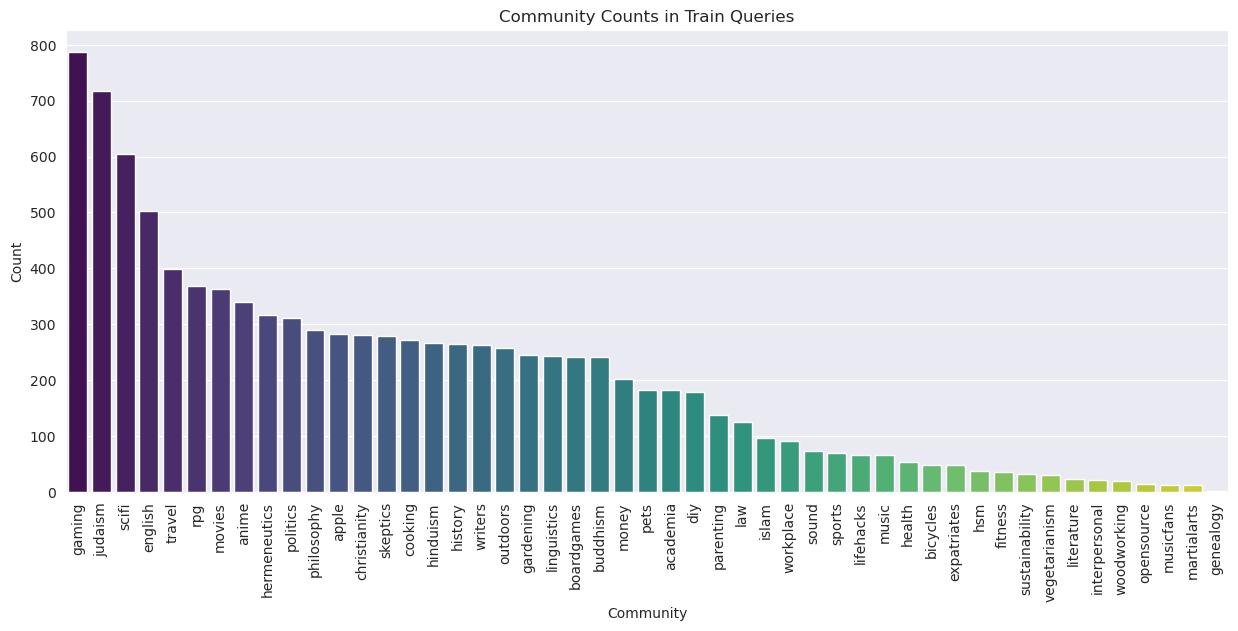

In [34]:
train_queries = pd.read_json('PIR_data/answer_retrieval/train/subset_data.jsonl', lines=True)
train_queries['community'] = train_queries['id'].apply(lambda x: x.split('_')[0])
community_counts = train_queries['community'].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=community_counts.index, y=community_counts.values, palette='viridis', hue=community_counts.index)
plt.xticks(rotation=90)
plt.title('Community Counts in Train Queries')
plt.xlabel('Community')
plt.ylabel('Count')
plt.show()


---

### USERS

In [35]:
users_df = pd.read_csv("PIR_data/users.csv",engine="python",on_bad_lines="skip")
display(users_df.head(3))
print("AboutMe EXAMPLE:\n\n", users_df['AboutMe'][7], sep='')

,Id,Reputation,CreationDate,DisplayName,AboutMe,Views,UpVotes,DownVotes,AccountId
0,-1,1,2010-11-18T19:05:26.543,Community,"<p>Hi, I'm not really a person.</p>\n<p>I'm a ...",151,5590,4155,-1.0
1,1,101,2010-11-18T20:21:51.560,Geoff Dalgas,<p>Dev #2 who helped create Stack Overflow cur...,807,0,0,2.0
2,2,101,2010-11-18T20:24:29.687,Jarrod Dixon,"<p>Former <a href=""http://blog.stackoverflow.c...",6,5,0,3.0


AboutMe EXAMPLE:

<p>Moderator on <a href="http://arqade.com">Arqade</a>.</p>

<p>I play games sometimes.</p>

<p>Twitter: @StrixVariaXIX</p>



for using the AboutMe field we need to treat the HTML tags and the possible links that we have to other profiles of the users (like Twitter, Instagram...)

,mean,std,median,25%,75%,99%,min,max
,,,,,,,,
Answer Length,85.23,269.48,0.0,0.0,34.0,1255.0,0,6401


Number of users with missing AboutMe: 1965652


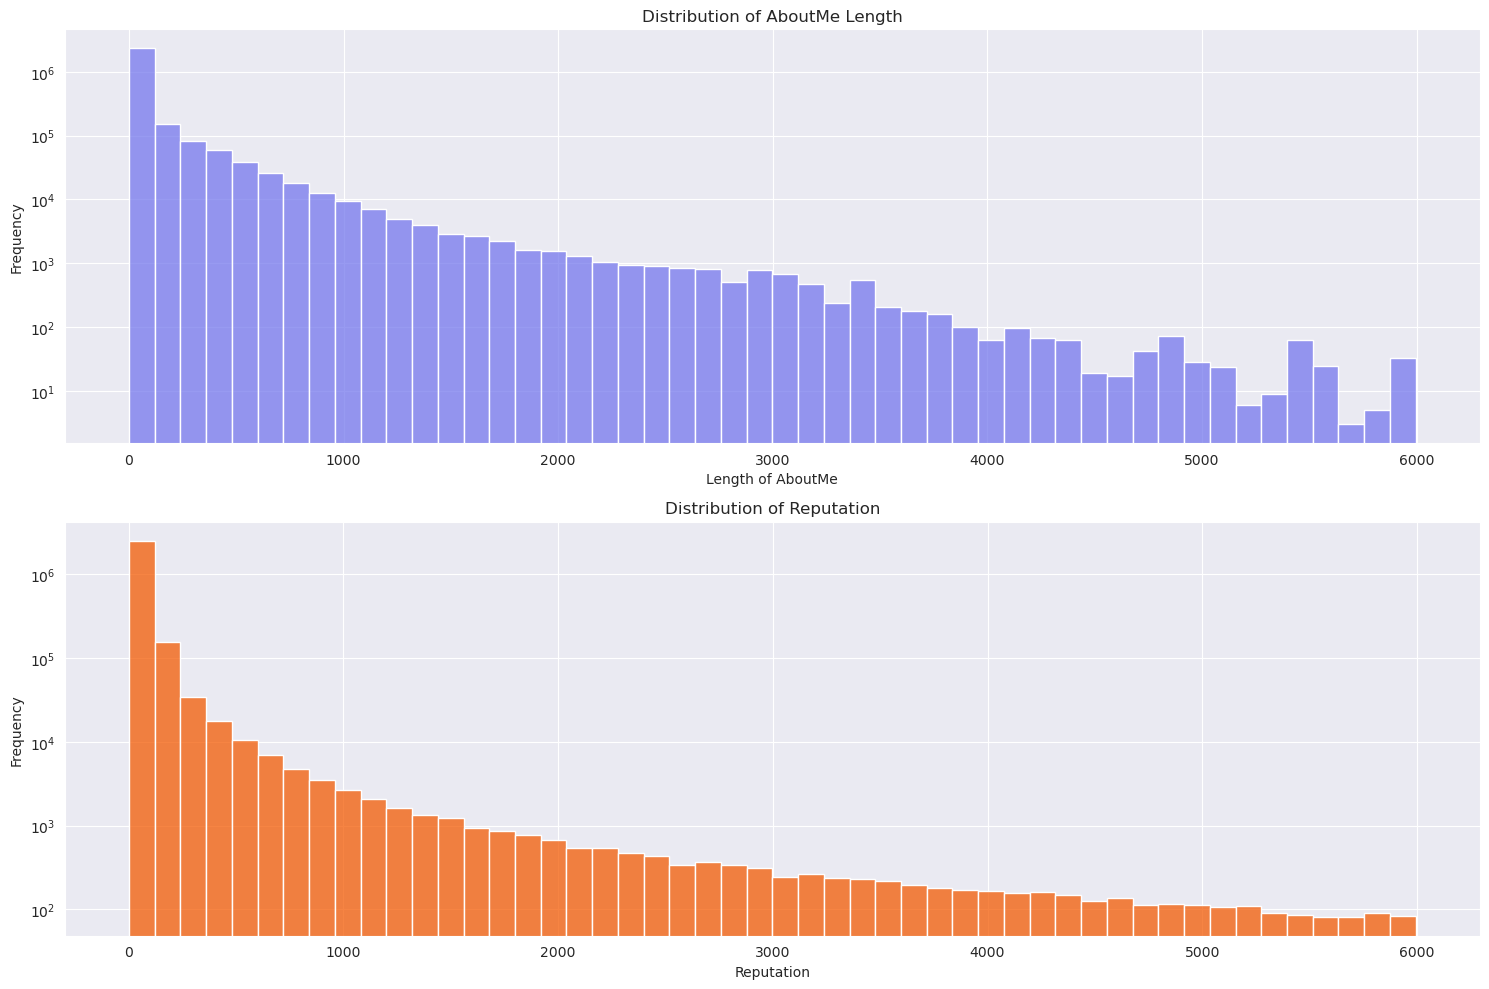

In [36]:
# Calculate the length of the AboutMe field
aboutme_length = users_df['AboutMe'].apply(lambda x: len(x) if pd.notnull(x) else 0)

# Calculate statistics for 'AboutMe' field
stats_df_text = get_stats_text(aboutme_length)
display(stats_df_text)
print("Number of users with missing AboutMe:", users_df['AboutMe'].isnull().sum())

# Set thresholds for visualization
aboutme_threshold = 6000
reputation_threshold = 6000

# Plot the distribution of AboutMe length
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
filtered_aboutme_length = aboutme_length[aboutme_length < aboutme_threshold]
sns.histplot(filtered_aboutme_length, bins=50, color='#7678ed')
plt.title('Distribution of AboutMe Length')
plt.xlabel('Length of AboutMe')
plt.ylabel('Frequency')
plt.yscale('log')

# Plot the distribution of Reputation
plt.subplot(2, 1, 2)
filtered_reputation = users_df['Reputation'][users_df['Reputation'] < reputation_threshold]
sns.histplot(filtered_reputation, bins=50, color='#f35b04')
plt.title('Distribution of Reputation')
plt.xlabel('Reputation')
plt.ylabel('Frequency')
plt.yscale('log')

plt.tight_layout()
plt.show()

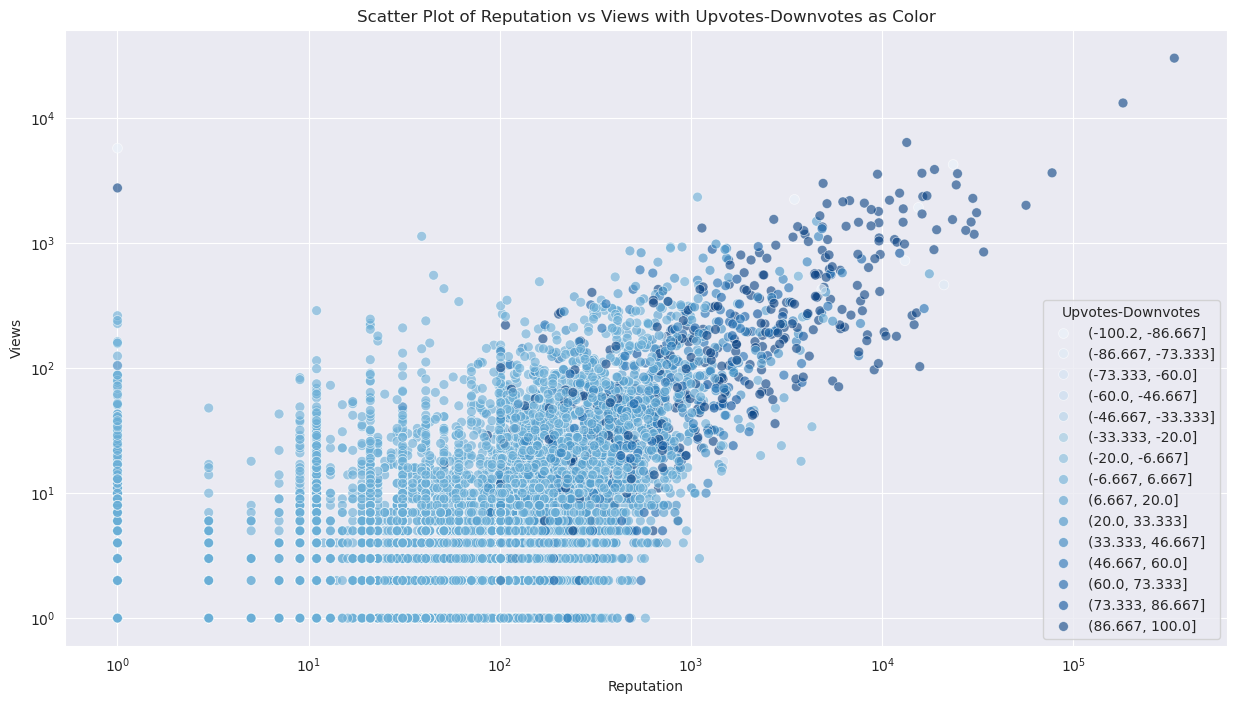

In [37]:
# calculate Upvoted - Downvotes
users_df['Upvotes_Downvotes'] = users_df['UpVotes'] - users_df['DownVotes']
# remove outliers for better visualization
users_df['Upvotes_Downvotes_Clipped'] = users_df['Upvotes_Downvotes'].clip(lower=-100, upper=100)
# siscretize the clipped values into bins
users_df['Upvotes_Downvotes_Binned'] = pd.cut(users_df['Upvotes_Downvotes_Clipped'], bins=15)

# Sample a subset of the data for visualization
sampled_users_df = users_df.sample(n=50000, random_state=42)

# Scatter plot
plt.figure(figsize=(15, 8))
scatter = sns.scatterplot(data=sampled_users_df, x='Reputation', y='Views', hue='Upvotes_Downvotes_Binned', 
                          alpha=0.6, edgecolor='w', palette='Blues', s=50)
plt.legend(title='Upvotes-Downvotes')
plt.title('Scatter Plot of Reputation vs Views with Upvotes-Downvotes as Color')
plt.xlabel('Reputation')
plt.ylabel('Views')
plt.xscale('log')
plt.yscale('log')
plt.show()

We can see some kind of linear relation between the Reputation, Upvotes-Downvotes and Views. So it makes sense to assume that the Reputation score pools together all such statistics of a user in a single number.

,Answers,Questions,Total
Metric,,,
Average Number,6.66,2.83,5.12
Percentage of users with One Entry,73.11,75.15,73.71


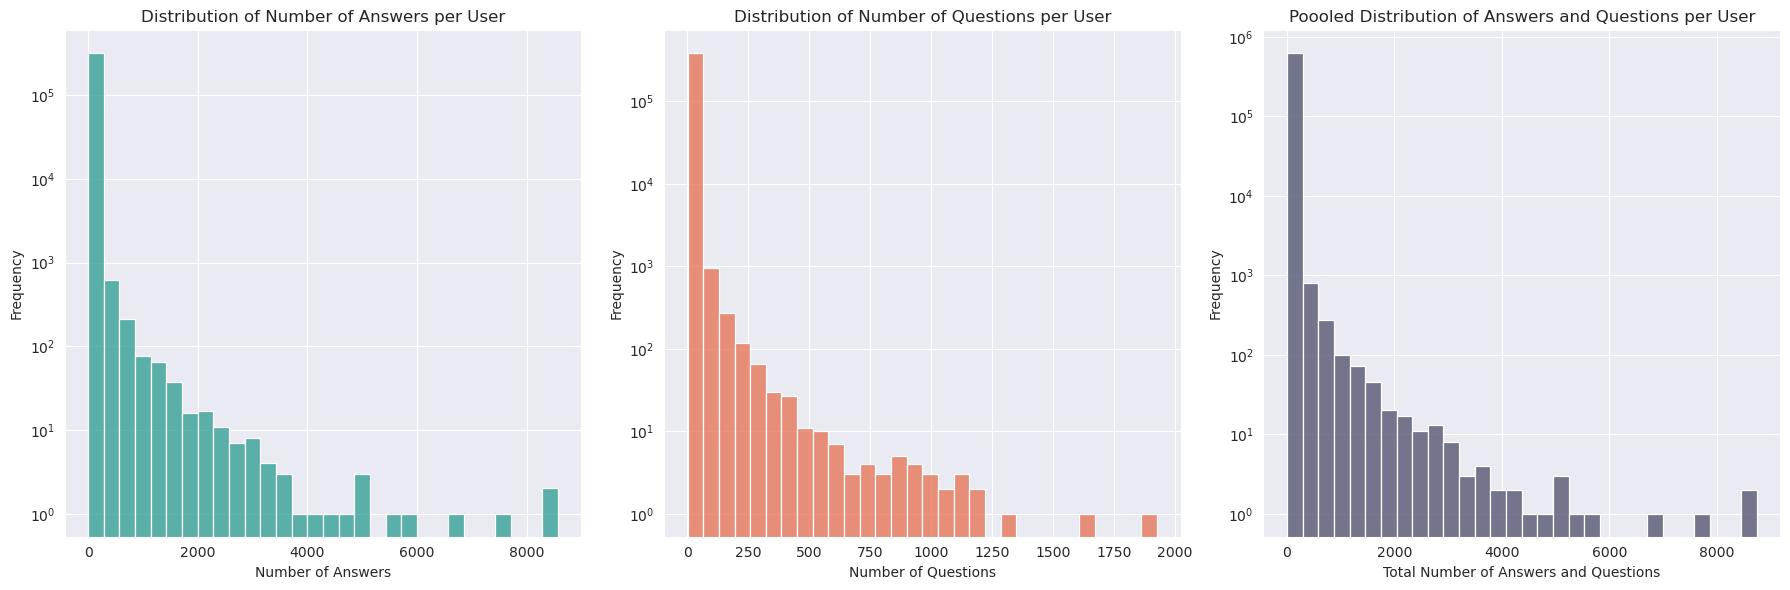

In [38]:
answers = pd.read_csv("PIR_data/answers.csv",engine="python",on_bad_lines="skip")
questions = pd.read_csv("PIR_data/questions.csv",engine="python",on_bad_lines="skip")

# group the answers by user and count the number of answers for each user
user_answer_counts = answers.groupby('AccountId').size()

# group the questions by user and count the number of questions for each user
user_question_counts = questions.groupby('AccountId').size()

# pooled counts of answers and questions
user_total_counts = user_answer_counts.add(user_question_counts, fill_value=0)

# compute stats
average_answers = user_answer_counts.mean()
percentage_one_answer = (user_answer_counts == 1).mean() * 100
average_questions = user_question_counts.mean()
percentage_one_question = (user_question_counts == 1).mean() * 100
average_total = user_total_counts.mean()
percentage_one_total = (user_total_counts == 1).mean() * 100

# Create a DataFrame to display the statistics
stats_data = {
    'Metric': ['Average Number', 'Percentage of users with One Entry'],
    'Answers': [average_answers, percentage_one_answer],
    'Questions': [average_questions, percentage_one_question],
    'Total': [average_total, percentage_one_total]
}

stats_df = round(pd.DataFrame(stats_data), 2)
stats_df = stats_df.set_index('Metric')
display(stats_df)

# Plot the distribution of the number of answers and questions per user
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for answers
sns.histplot(user_answer_counts, bins=30, ax=axes[0], color='#2a9d8f')
axes[0].set_title('Distribution of Number of Answers per User')
axes[0].set_xlabel('Number of Answers')
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')

# Plot for questions
sns.histplot(user_question_counts, bins=30, ax=axes[1], color='#e76f51')
axes[1].set_title('Distribution of Number of Questions per User')
axes[1].set_xlabel('Number of Questions')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')

# Plot for total answers and questions
sns.histplot(user_total_counts, bins=30, ax=axes[2], color='#4a4e69')
axes[2].set_title('Poooled Distribution of Answers and Questions per User')
axes[2].set_xlabel('Total Number of Answers and Questions')
axes[2].set_ylabel('Frequency')
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

We can see that the majority of users created a profile for writing just a single answer or question, so for the majority of users we don't have a lot of data. and then we have in the long tail the users that actually use frequently the platform.

Now we can take a look at the specific users that we will use, that are the one that have written a question (between one of the test, train and val sets), or that have written an answer (between the subset_answers). 

First we check that the entry *'user_id'* and the *'AccountId'* are the same

In [39]:
# train_queries = pd.read_json('PIR_data/answer_retrieval/train/subset_data.jsonl', lines=True)
# val_queries = pd.read_json('PIR_data/answer_retrieval/val/subset_data.jsonl', lines=True)
# test_queries = pd.read_json('PIR_data/answer_retrieval/test/subset_data.jsonl', lines=True)

# full dataset of questions
# questions = pd.read_csv("PIR_data/questions.csv",engine="python",on_bad_lines="skip")
questions = questions.rename(columns={'Id': 'id'})[['id', 'AccountId']]

# our subset of queries (train, val, test)
subset_questions = pd.concat([train_queries, val_queries, test_queries], ignore_index=True)
subset_questions = subset_questions[['id', 'user_id']]
questions_ids = subset_questions['id'].unique()

# take from all the questions only the ones that are in the subset of data
questions = questions[questions['id'].isin(questions_ids)]
# merge the dataframes on the id column (questions)
merged_df = questions.merge(subset_questions, on='id', how='inner')
# Check if userId matches accountId
matching_ids = merged_df['user_id'] == merged_df['AccountId']

# Print the result
print(f"Number of matching IDs: {matching_ids.sum()}")
print(f"Percentage of matching IDs: {matching_ids.mean() * 100:.2f}%")
print("non matching IDs:")
display(merged_df[~matching_ids])

Number of matching IDs: 10196
Percentage of matching IDs: 99.96%
non matching IDs:


,id,AccountId,user_id
1602,scifi_83083,NaN,2706
1880,scifi_200360,NaN,1344292
3601,movies_4118,NaN,2706
3897,movies_96869,NaN,1344292


A part from a few nan values, we can say that the *'AccountId'* and *'user_id'* coincides

In [40]:
# answers = pd.read_csv("PIR_data/answer_retrieval/answers.csv",engine="python",on_bad_lines="skip")
# take the answers that are in corpus_df (subset_answers)
subset_answers = answers[answers['Id'].isin(corpus_df['docno'])]
user_answers = subset_answers['AccountId']
user_questions = subset_questions['user_id']

all_users = set(user_answers) | set(user_questions)

# take only the users that are in the subset of data
users_df = users_df[users_df['Id'].isin(all_users)]

# see null values here
nan_stats = users_df.isna().sum()
total_entries = len(users_df)
nan_percentage = (nan_stats / total_entries) * 100
nan_stats = pd.DataFrame(nan_stats, columns=['Count'])
nan_stats['%'] = nan_percentage.round(1)
nan_stats.columns.name = 'NaN'

print("Number of users in our subset of users:", total_entries)
total_questions_answers = len(train_queries['id'].unique()) + len(val_queries['id'].unique()) + \
                          len(test_queries['id'].unique()) + len(subset_answers['Id'].unique())
print("Number of answers/questions in our subset of data:", total_questions_answers)
print("Ration of answers/questions to users:", round(total_questions_answers / total_entries, 2))
print("\nNaN values in our subset of users:")
display(nan_stats)

Number of users in our subset of users: 12268
Number of answers/questions in our subset of data: 18810
Ration of answers/questions to users: 1.53

NaN values in our subset of users:


NaN,Count,%
Id,0,0.0
Reputation,0,0.0
CreationDate,0,0.0
DisplayName,1,0.0
AboutMe,8013,65.3
Views,0,0.0
UpVotes,0,0.0
DownVotes,0,0.0
AccountId,0,0.0
Upvotes_Downvotes,0,0.0


---

### POSTLINKS

In [41]:
postlinks_df = pd.read_csv("PIR_data/postlinks.csv",engine="python",on_bad_lines="skip")
display(postlinks_df.head(3))

,PostId,RelatedPostId,LinkType
0,writers_76,writers_113,related
1,writers_194,writers_171,related
2,writers_107,writers_138,related


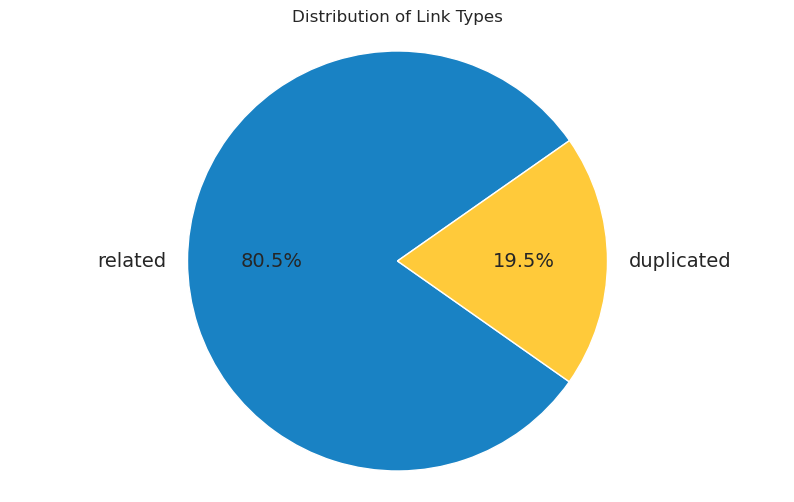

In [42]:
link_type_counts = postlinks_df['LinkType'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(link_type_counts, labels=link_type_counts.index, autopct='%1.1f%%', startangle=35, 
        colors=['#1982c4','#ffca3a'], textprops={'fontsize': 14})
plt.title('Distribution of Link Types')
plt.axis('equal')
plt.show()